# Linear regression

### 1. Load the provided .npy files. You can load it with numpy.

* each file contains one vector, X and y
* visualize X vs y on a scatter plot
* fit an  y=w_0 + w_1⋅X + w_2⋅X^2  linear regression using `sklearn`

### 2. Using different features

* plot the residuals (the difference between the prediction and the actual  y ) vs the original  y 
* a non-random-noise like pattern suggests non-linear connection between the features and the predictions
* someone told us that the connection between X and y is  y=A⋅X+B⋅cos^3(X)+C⋅X^2+D 
  * using sklearn's linear regression estimate  A,B,C,D !
* plot the residuals again! is it better now?

### 3. Other methdods than sklearn for linear regression

* using the statsmodels package perform the same linear regression as in 2.) (hint: use statsmodels.api.OLS)
* is the result the same? if not guess, why? (did you not forget to add the constant term?)
* try to get the same results with statsmodels as with sklearn!
* using the analytic solution formula shown during the lecture, calculate the coefficients (A, B, C, D). are they the same compared to the two previous methods?

### 4.

* load the [real_estate](https://gist.github.com/qbeer/f356d7144543cbb09c9792c34b8ad722) data to a pandas dataframe
drop the ID column and the geographic location columns
fit a linear regression model to predict the unit price using sklearn
* interpret the coefficients and their meaning shortly with your own words
* plot the residuals for the predictions. if you had to decide only on this information, which house would you buy?

### 5.
* Using the same dataset from task 4) compute the parameters of the multivariate regression model via gradient descent. 
* Compare the calculated parameters with the ones obtained in task 4) via sklearn. Is there any difference? If so give your explanation.

Hint: you can use a function to calculate the loss and a function to perform the gradient descent to learn the parameters. Example:

```python
def comp_cost(X, y, theta):
    """Compute cost given X, y and parameters theta."""
    .
    .
    .
    return J
```

```python
def grad_descent(X, y, theta, alpha, num_iters):
    """Perform gradient descent"""
    .
    .
    .   
    return J_history, theta
```

---

## Hints:

* On total you can get 10 points for fully completing all tasks.
* Decorate your notebook with, questions, explanation etc, make it self contained and understandable!
* Comments you code when necessary
* Write functions for repetitive tasks!
* Use the pandas package for data loading and handling
* Use matplotlib and seaborn for plotting or bokeh and plotly for interactive investigation
* Use the scikit learn package for almost everything
* Use for loops only if it is really necessary!
* Code sharing is not allowed between student! Sharing code will result in zero points.
* If you use code found on web, it is OK, but, make its source clear!

In [1]:
# Data generation

import numpy as np

N = 1000
np.random.seed(42)
X = np.random.uniform(-100, 100, N)

A = 1.2
B = 124
C = 9/137
D = -50

y = A*(X + np.random.uniform(-1, 1, N)) + B*np.cos(X+ np.random.uniform(-0.05, 0.05, N))**3 + C*(X + np.random.uniform(-1, 1, N))**2 + D + np.random.uniform(-1, 1, N)

np.save('X', X)
np.save('y', y)

# 1.

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


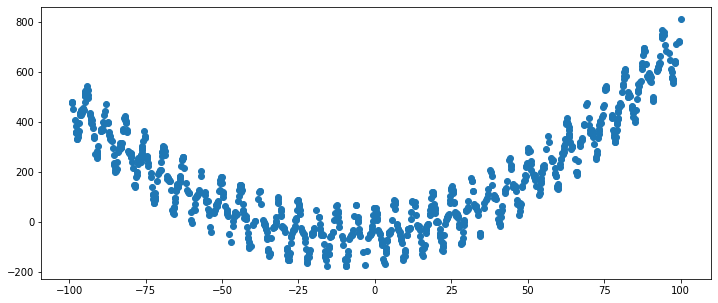

In [2]:
import pandas as pd
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

%pylab inline

X = np.load('X.npy')
y = np.load('y.npy')

plt.figure(figsize=(12, 5))
plt.scatter(X, y)

data = pd.DataFrame({'a':X, 'b':X**2})
lr = LinearRegression()
lr.fit(data, y)

preds = lr.predict(data)

# 2.

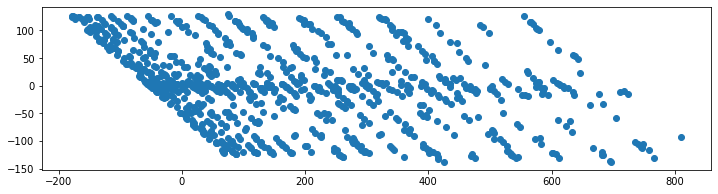

In [3]:
plt.figure(figsize=(12, 3))
plt.scatter(y, preds-y)

data = pd.DataFrame({'a':X, 'b':np.cos(X)**3, 'c':X**2})
lr = LinearRegression()
lr.fit(data, y)

preds = lr.predict(data)

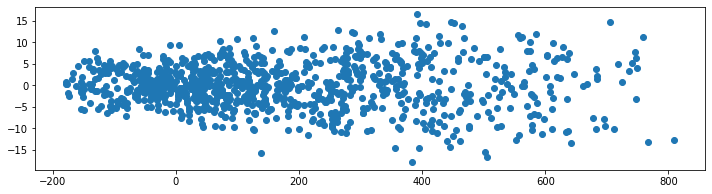

In [4]:
plt.figure(figsize=(12, 3))
plt.scatter(y, preds-y)

# 3.

In [5]:
lr.intercept_, lr.coef_

data['D'] = 1
model = sm.OLS(y, data)

results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 5.596e+05
Date:                Tue, 04 Oct 2022   Prob (F-statistic):               0.00
Time:                        18:03:31   Log-Likelihood:                -3074.8
No. Observations:                1000   AIC:                             6158.
Df Residuals:                     996   BIC:                             6177.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
a              1.1968      0.003    420.898      0.0

In [6]:
d = data.values
np.linalg.inv(d.T@d)@(d.T@y)

array([ 1.19676853e+00,  1.23567661e+02,  6.56986322e-02, -5.00710927e+01])

# 4. 

In [7]:
data = pd.read_csv('real_estate.csv')
data.pop('No');
data.pop('X5 latitude');
data.pop('X6 longitude');
y = data.pop('Y house price of unit area')
data.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores
0,2012.917,32.0,84.87882,10
1,2012.917,19.5,306.59470,9
2,2013.583,13.3,561.98450,5
3,2013.500,13.3,561.98450,5
4,2012.833,5.0,390.56840,5


In [8]:
lr.fit(data, y)
print(lr.intercept_, lr.coef_)

-11588.747800126168 [ 5.77804282e+00 -2.54477973e-01 -5.51299698e-03  1.25786410e+00]


-11588.747800126168 [ 5.77804282e+00 -2.54477973e-01 -5.51299698e-03  1.25786410e+00]


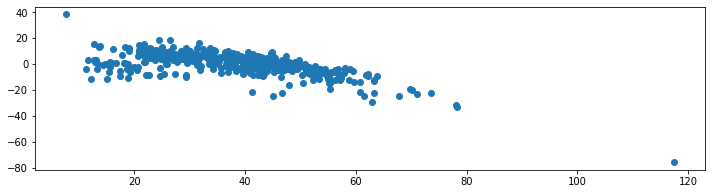

In [9]:
print(lr.intercept_, lr.coef_)

plt.figure(figsize=(12, 3))
plt.scatter(y, lr.predict(data)-y)

Text(0, 0.5, 'actual price')

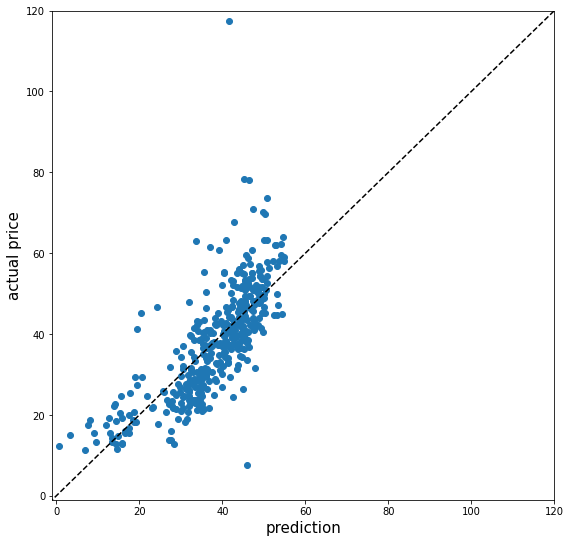

In [10]:
plt.figure(figsize=(9, 9))
plt.scatter(lr.predict(data), y)
plt.plot([-10, 120], [-10, 120], c='k', ls='--')
plt.xlim(-1, 120)
plt.ylim(-1, 120)


plt.xlabel('prediction', fontsize=15)
plt.ylabel('actual price', fontsize=15)

# 5.

Create matrix of features.

In [11]:
# normalizing
data_norm = (data-data.mean())/data.std()
# adding vector of values 1 to the first column
X0 = np.ones(len(data_norm))
data_norm.insert(loc=0, column='X0', value=X0)
X = data_norm.values

Define functions for computing the loss and perfoming the gradient descent.

In [12]:
def comp_cost(X, y, theta):

    m = len(y)
    J = 1/(2*m)*np.dot((np.dot(X,theta)-y),(np.dot(X,theta)-y))
    
    return J

# Vectorized implementation
def comp_cost_vectorized(X, y, theta):

    m = len(y)
    J = 1/(2*m)*(X @ theta-y).T @ (X @ theta-y)
    
    return J

In [13]:
def grad_descent(X, y, theta, alpha, num_iters):
    
    m = len(y)
    J_history = np.zeros(num_iters)
    theta_temp = np.zeros(X.shape[1])
    
    for iter in range(num_iters):
        
        theta_temp[0] = theta[0] - (alpha/m)*np.sum(np.dot(X, theta)-y)
        for idx_theta_temp in range(len(theta))[1:]:
            theta_temp[idx_theta_temp] = theta_temp[idx_theta_temp] - (alpha/m)*np.sum(np.dot((np.dot(X, theta)-y), X[:,idx_theta_temp]))
            
        for idx_theta in range(len(theta)):
            theta[idx_theta] = theta_temp[idx_theta]
            
        J_history[iter] = comp_cost(X, y, theta)
    

    return J_history, theta

# Vectorized implementation
def grad_descent_vectorized(X, y, theta, alpha, num_iters):
    
    m = len(y)
    J_history = np.zeros(num_iters)
    theta_temp = np.zeros(X.shape[1])
    
    for iter in range(num_iters):
        theta -= alpha/m*X.T @ (X@theta - y)
        J_history[iter] = comp_cost_vectorized(X, y, theta)
    

    return J_history, theta

In [14]:
%%time
# perform gradient descent to calculate theta

theta = np.zeros(X.shape[1])
num_iters = 3000
alpha = 0.003

J_history, theta = grad_descent(X, y, theta, alpha, num_iters)

CPU times: user 2.01 s, sys: 86.8 ms, total: 2.09 s
Wall time: 2.01 s


In [15]:
%%time
# perform gradient descent - vectorized - to calculate theta 

theta = np.zeros(X.shape[1])
num_iters = 3000
alpha = 0.003

J_history_vec, theta_vec = grad_descent_vectorized(X, y, theta, alpha, num_iters)

CPU times: user 1.22 s, sys: 60.8 ms, total: 1.28 s
Wall time: 1.21 s


In [16]:
np.isclose(J_history, J_history_vec).any()

True

Text(0, 0.5, 'Loss')

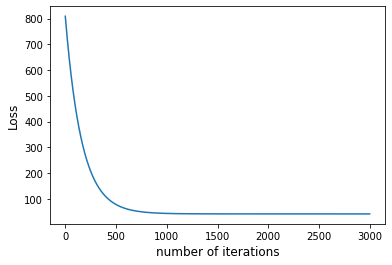

In [17]:
plt.plot(range(num_iters), J_history_vec)
plt.xlabel('number of iterations', fontsize=12)
plt.ylabel('Loss', fontsize=12)

In [18]:
print('Obtained parameters via gradient descent: ', theta)
print('Obtained parameters via gradient descent - vectorized: ', theta_vec)
print('Obtained parameters via sklearn: ', lr.intercept_, lr.coef_)

Obtained parameters via gradient descent:  [37.97556908  1.62369662 -2.9042528  -6.91148237  3.75148186]
Obtained parameters via gradient descent - vectorized:  [37.97556908  1.62369662 -2.9042528  -6.91148237  3.75148186]
Obtained parameters via sklearn:  -11588.747800126168 [ 5.77804282e+00 -2.54477973e-01 -5.51299698e-03  1.25786410e+00]


Difference in the parmeters obtained via sklearn and gradient descent is because data passed to sklearn was not normalized
while data used for gradient descent was. Lets check it.

In [19]:
lr.fit((data-data.mean())/data.std(), y)
print('Obtained parameters via sklearn with normalized data: ', lr.intercept_, lr.coef_)

Obtained parameters via sklearn with normalized data:  37.98019323671437 [ 1.62921879 -2.89913637 -6.95800639  3.70511645]


Text(0, 0.5, 'actual price')

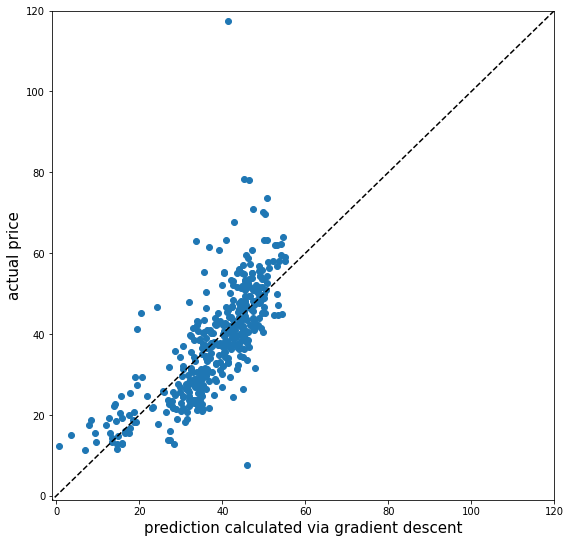

In [20]:
plt.figure(figsize=(9, 9))
plt.scatter(X@theta_vec, y)
plt.plot([-10, 120], [-10, 120], c='k', ls='--')
plt.xlim(-1, 120)
plt.ylim(-1, 120)
plt.xlabel('prediction calculated via gradient descent', fontsize=15)
plt.ylabel('actual price', fontsize=15)